In [1]:
import pandas as pd 
import numpy as np 

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator
import plotly.graph_objects as go
import missingno as msno

import geopandas as gpd

#ML modules
from sklearn import datasets

from sklearn.linear_model import LinearRegression

In [2]:
df_London= pd.read_csv('/Users/surajrajakrishnan/work/HousePricePrediction/London.csv')

In [3]:
df_London

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [4]:
df_London2=pd.read_csv('/Users/surajrajakrishnan/work/HousePricePrediction/YearlyHousePrice-London_Dataset.csv')

In [5]:
df_London=df_London.drop(['Unnamed: 0'],axis=1)

In [6]:
df_London2

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,K03000001,great britain,2019-12-01,30446.0,NaN,37603,NaN,NaN,NaN,NaN,NaN,0
1067,K04000001,england and wales,2019-12-01,30500.0,NaN,37865,NaN,NaN,NaN,NaN,NaN,0
1068,N92000002,northern ireland,2019-12-01,27434.0,NaN,32083,NaN,NaN,NaN,NaN,NaN,0
1069,S92000003,scotland,2019-12-01,30000.0,NaN,34916,NaN,NaN,NaN,NaN,NaN,0


In [7]:
df_London.shape

(3480, 10)

In [8]:
## Data Processing
df_London.dtypes

Property Name        object
Price                 int64
House Type           object
Area in sq ft         int64
No. of Bedrooms       int64
No. of Bathrooms      int64
No. of Receptions     int64
Location             object
City/County          object
Postal Code          object
dtype: object

In [9]:
df_London.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,3480.0,1.864173e+06,2.267283e+06,180000.0,750000.0,1220000.0,2150000.00,39750000.0
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.0,834.0,1310.0,2157.25,15405.0
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.0,3.0,4.00,10.0
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.0,3.0,4.00,10.0
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.0,2.0,3.0,4.00,10.0


In [10]:
df_London.isnull().sum()

Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

In [11]:
obj_col=df_London.dtypes =='object'
int_col=df_London.dtypes =='int64'
print("Categorical Variables:",len(list(obj_col[obj_col].index)))
print("Numerical Variables:",len(list(int_col[int_col].index)))

Categorical Variables: 5
Numerical Variables: 5


In [12]:
df_London['New Price']=df_London['Price']/1000
df_London['Price per sq ft']=df_London['Area in sq ft']/df_London['New Price']

In [13]:
## EDA Heatmap using SNS lib

<AxesSubplot:>

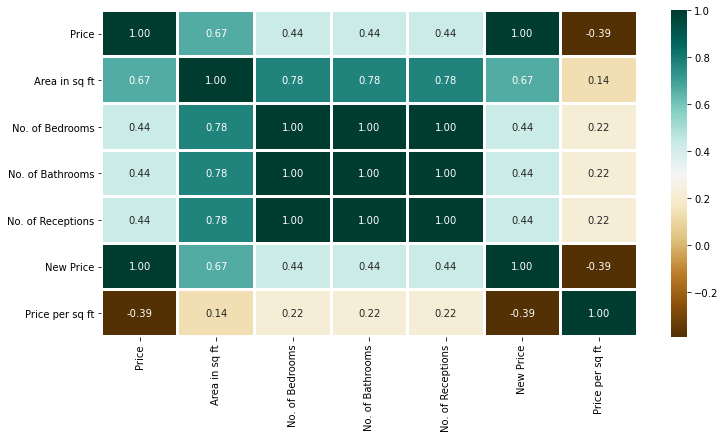

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df_London.corr(),
           cmap='BrBG',fmt='.2f',
            linewidth=2,
           annot= True)

Skewness: % 5.77264550423514
Kurtosis:%  55.76316936927732


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


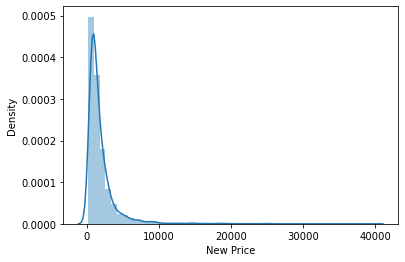

In [15]:
#plot histogram
sns.distplot(df_London['New Price']);
print('Skewness: %',df_London['New Price'].skew())
print('Kurtosis:% ',df_London['New Price'].kurt())

In [16]:
## skewness and kutosis are two ways to measure the shape of a distribution
# skewness is a measure of asymmeter. Ideally the score should be 0.
#Kurtosis is a measure is a measure to find id the distribution is heavy tailed or high tailed . IF the score is
#greateter than 3 then it has many outliers

In [17]:
df_London.head(5)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,New Price,Price per sq ft
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,1675.0,1.621493
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,650.0,1.252308
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,735.0,1.035374
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,1765.0,1.125212
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,675.0,1.037037


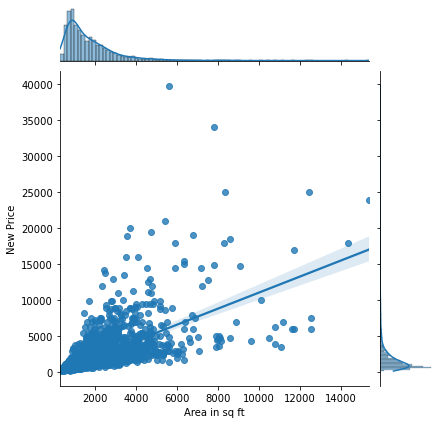

In [18]:
#Area vs Sales New price
sns.jointplot(x=df_London['Area in sq ft'],y=df_London['New Price'],kind='reg')

In [19]:
#It make sense that people pay high for more living area

In [20]:
## Removing outliers
new_df_London=df_London.drop(df_London[(df_London['New Price']> 6000) |
                                       
                                       (df_London['Area in sq ft'] >8000)].index).reset_index(drop=True)

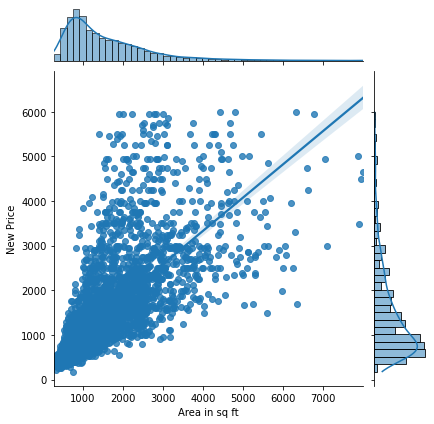

In [21]:
sns.jointplot(x=new_df_London['Area in sq ft'],y=new_df_London['New Price'],kind='reg')

In [22]:
print('Skewness: %',new_df_London['New Price'].skew())
print('Kurtosis:% ',new_df_London['New Price'].kurt())

Skewness: % 1.616797155470918
Kurtosis:%  2.6032362297789975


In [23]:
print('New',new_df_London.shape)
print('Old',df_London.shape)

New (3339, 12)
Old (3480, 12)


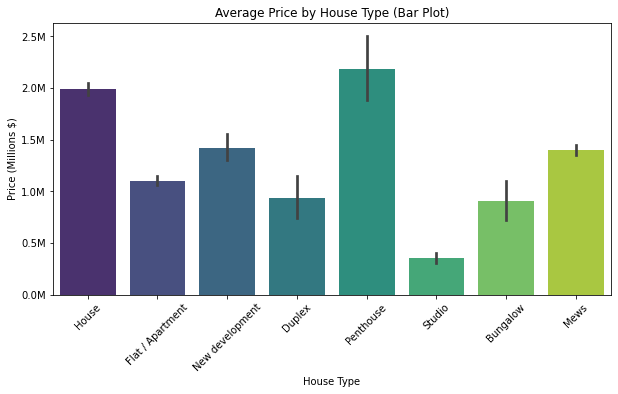

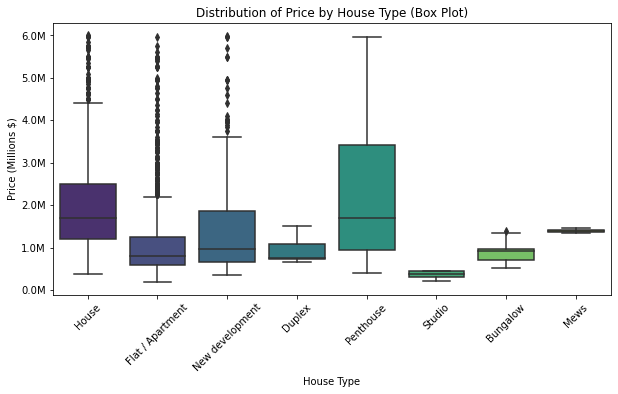

In [24]:
# Convert Price to millions
new_df = new_df_London.copy()  # Create a copy of the original DataFrame
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Plotting using bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Average Price by House Type (Bar Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

# Plotting using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Distribution of Price by House Type (Box Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

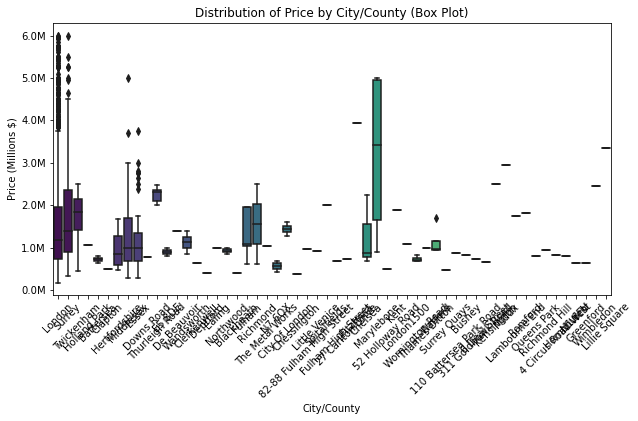

In [25]:
# Plotting using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df, x='City/County', y='Price', palette='viridis')
plt.title('Distribution of Price by City/County (Box Plot)')
plt.xlabel('City/County')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

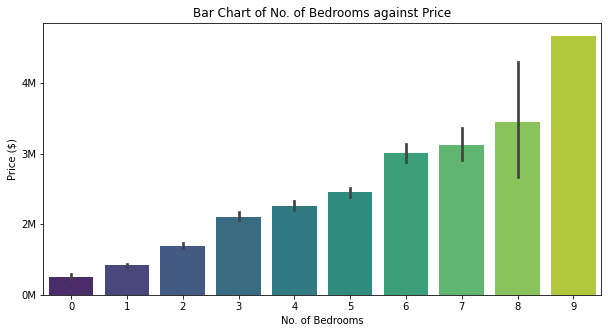

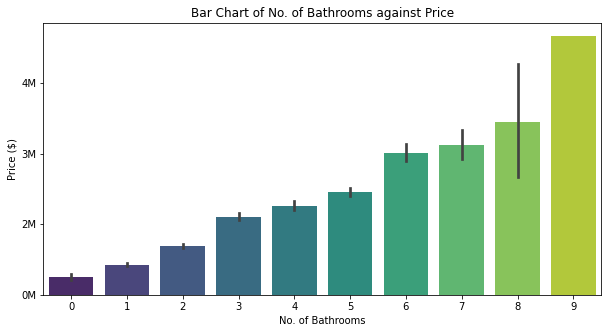

In [26]:
# Plot bar chart of No. of Bedrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=new_df, x='No. of Bedrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bedrooms against Price')
ax.set_xlabel('No. of Bedrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
formatter = FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000))  # Format y-axis labels to display in millions
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

# Plot bar chart of No. of Bathrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=new_df, x='No. of Bathrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bathrooms against Price')
ax.set_xlabel('No. of Bathrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

In [27]:
print(new_df['No. of Bathrooms'].value_counts())
print(new_df['No. of Bedrooms'].value_counts())

2    1070
3     678
4     551
5     418
1     414
6     150
7      40
0      10
8       7
9       1
Name: No. of Bathrooms, dtype: int64
2    1070
3     678
4     551
5     418
1     414
6     150
7      40
0      10
8       7
9       1
Name: No. of Bedrooms, dtype: int64


In [28]:
new_df_London=new_df.drop(new_df[(new_df['No. of Bathrooms']> 7) |
                                       
                                       (new_df['No. of Bedrooms'] >7)].index).reset_index(drop=True)

In [29]:
print('Skewness: %',new_df_London['New Price'].skew())
print('Kurtosis:% ',new_df_London['New Price'].kurt())

Skewness: % 1.6119903603416976
Kurtosis:%  2.596920571974449


In [34]:
new_df_London.shape

(3331, 12)

In [35]:
## Geo coding

In [36]:
import geopy
from geopy.geocoders import Nominatim

In [37]:
geo_df = new_df_London[['Price', 'Postal Code']].copy()
geo_df.head(5)

,Price,Postal Code
0,1675000,SW19 8NY
1,650000,EC1V 3PA
2,735000,SW15 1QL
3,1765000,SW15 1LP
4,675000,SW15 1PL


In [38]:


# Define geolocator
geolocator = Nominatim(user_agent="my_geocoder")

def my_geocoder(row):
    try:
        location = geolocator.geocode(row)
        if location:
            return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})
        else:
                print(f"Geocoding failed for {row}. Location not found.")
                return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
    except Exception as e:
        print(f"Error geocoding {row}: {e}")
        return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})

# Apply my_geocoder function to 'Postal Code' column
geo_df[['Latitude', 'Longitude']] = geo_df['Postal Code'].apply(lambda x: my_geocoder(x))

# Drop rows where Latitude or Longitude is NaN
geo_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create GeoDataFrame
geo_df = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.Longitude, geo_df.Latitude))
geo_df.crs = {'init': 'epsg:4326'}

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(geo_df["Latitude"])) / len(geo_df)) * 100))

geo_df.head()

Geocoding failed for N8 9JJ. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E2 8HN. Location not found.
Geocoding failed for E14 9YT. Location not found.
Geocoding failed for NW7 1NY. Location not found.
Geocoding failed for EC2M 4JY. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for E14 9YT. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for E16 2QJ. Location not found.
Geocoding failed for SE16 7UD. Location not found.
Geocoding failed for EC1V 2QQ. Location not found.
Geocoding failed for RM12 6RS. Location not found.
Geocoding failed for NW3 7ST. Location not found.
100.0% of addresses were geocoded!


/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Price,Postal Code,Latitude,Longitude,geometry
0,1675000,SW19 8NY,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,650000,EC1V 3PA,51.52640,-0.09785,POINT (-0.09785 51.52640)
2,735000,SW15 1QL,51.46507,-0.22364,POINT (-0.22364 51.46507)
3,1765000,SW15 1LP,51.46910,-0.22255,POINT (-0.22255 51.46910)
4,675000,SW15 1PL,51.46342,-0.22228,POINT (-0.22228 51.46342)


In [39]:
geo_df

,Price,Postal Code,Latitude,Longitude,geometry
0,1675000,SW19 8NY,51.424780,-0.189490,POINT (-0.18949 51.42478)
1,650000,EC1V 3PA,51.526400,-0.097850,POINT (-0.09785 51.52640)
2,735000,SW15 1QL,51.465070,-0.223640,POINT (-0.22364 51.46507)
3,1765000,SW15 1LP,51.469100,-0.222550,POINT (-0.22255 51.46910)
4,675000,SW15 1PL,51.463420,-0.222280,POINT (-0.22228 51.46342)
...,...,...,...,...,...
3326,1750000,SW10 0XB,51.474420,-0.181070,POINT (-0.18107 51.47442)
3327,3500000,SW7 5JW,51.496180,-0.179750,POINT (-0.17975 51.49618)
3328,3350000,SW6 1UE,51.486628,-0.197332,POINT (-0.19733 51.48663)
3329,5275000,SW1A 1JT,51.507530,-0.140700,POINT (-0.14070 51.50753)


In [40]:
geo_df.shape

(3314, 5)

In [42]:
geo_df.to_csv("/Users/surajrajakrishnan/work/HousePricePrediction/Geo_encoded_london_data.csv")

In [44]:
house_data =  pd.merge(new_df_London, geo_df, on='Postal Code', how='left')

house_data=house_data.drop(['Property Name','Location','City/County','Postal Code','geometry','Price_x','Price_y','Price per sq ft'],axis=1)


In [45]:
house_data

,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,New Price,Latitude,Longitude
0,House,2716,5,5,5,1675.0,51.424780,-0.189490
1,Flat / Apartment,814,2,2,2,650.0,51.526400,-0.097850
2,Flat / Apartment,814,2,2,2,650.0,51.526400,-0.097850
3,Flat / Apartment,814,2,2,2,650.0,51.526400,-0.097850
4,Flat / Apartment,814,2,2,2,650.0,51.526400,-0.097850
...,...,...,...,...,...,...,...,...
5424,New development,1410,3,3,3,3350.0,51.486628,-0.197332
5425,New development,1410,3,3,3,3350.0,51.486628,-0.197332
5426,New development,1410,3,3,3,3350.0,51.486628,-0.197332
5427,Flat / Apartment,1749,3,3,3,5275.0,51.507530,-0.140700


In [46]:
## One hot encoding for label categorical data
from sklearn.preprocessing import OneHotEncoder

s = (house_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
len(object_cols))


Categorical variables:
['House Type']
No. of. categorical features:  1


In [49]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(house_data[object_cols]))
OH_cols.index = house_data.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = house_data.drop(object_cols, axis=1)
df_final = pd.concat([house_data, OH_cols], axis=1)


In [50]:
df_final=df_final.drop(['House Type'],axis=1)

In [51]:
df_final_1=df_final.dropna()

In [66]:
df_final_1.head()

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,New Price,Latitude,Longitude,x0_Bungalow,x0_Duplex,x0_Flat / Apartment,x0_House,x0_Mews,x0_New development,x0_Penthouse,x0_Studio
0,2716,5,5,5,1675.0,51.42478,-0.18949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,814,2,2,2,650.0,51.52640,-0.09785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,814,2,2,2,650.0,51.52640,-0.09785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,814,2,2,2,650.0,51.52640,-0.09785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,814,2,2,2,650.0,51.52640,-0.09785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final_1.drop(['New Price'], axis=1)
Y = df_final_1['New Price']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [54]:
X_train

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Latitude,Longitude,x0_Bungalow,x0_Duplex,x0_Flat / Apartment,x0_House,x0_Mews,x0_New development,x0_Penthouse,x0_Studio
1695,869,2,2,2,51.459260,-0.212570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
385,1504,3,3,3,51.495050,-0.156220,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4496,1020,2,2,2,51.546070,-0.162470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1229,792,2,2,2,51.530680,-0.107670,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1758,1255,1,1,1,51.545040,-0.081560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,2421,4,4,4,51.571150,-0.142080,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3277,678,2,2,2,51.462710,-0.155550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1661,1438,3,3,3,51.463510,-0.185360,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2620,2899,4,4,4,51.492855,-0.272416,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

MAE=mean_absolute_percentage_error(Y_valid, Y_pred)



In [56]:
print('Absolute Error',MAE)

Absolute Error 0.10847553949995473


In [57]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_valid, Y_pred))  
print('MSE:', metrics.mean_squared_error(Y_valid, Y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, Y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_valid, Y_pred))

MAE: 160.52334552720694
MSE: 115449.19151340814
RMSE: 339.7781504355572
VarScore: 0.8806211906631619


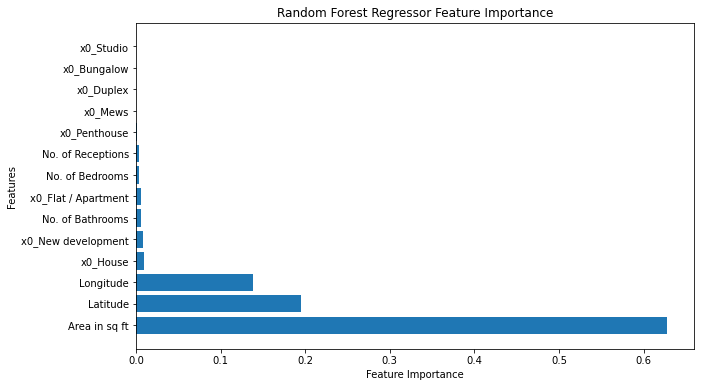

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define the feature names
features = ['Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms',
            'No. of Receptions', 'Latitude', 'Longitude',
            'x0_Bungalow',
'x0_Duplex',              
'x0_Flat / Apartment',    
'x0_House',               
'x0_Mews',               
'x0_New development',
'x0_Penthouse'  ,         
'x0_Studio' 
           ]

# Get feature importances from the trained model
importances = model_RFR.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Rearrange feature names based on sorted feature importances
sorted_features = [features[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[sorted_indices], align='center')
plt.yticks(range(len(features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor Feature Importance')
plt.show()

In [174]:
model_RFR.predict(X_valid)

array([ 453.87      ,  535.40976664, 4769.5       , ...,  650.        ,
       1304.2       , 1943.        ])

In [178]:
X_valid

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Latitude,Longitude,x0_Bungalow,x0_Duplex,x0_Flat / Apartment,x0_House,x0_Mews,x0_New development,x0_Penthouse,x0_Studio
3721,464,1,1,1,51.545400,-0.152250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1746,558,1,1,1,51.458110,-0.192760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4133,2650,5,5,5,51.511320,-0.192860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1124,1399,3,3,3,51.459260,-0.212570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1121,1399,3,3,3,51.459260,-0.212570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,1612,3,3,3,51.556670,-0.192670,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1183,810,2,2,2,51.469397,-0.210496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2455,877,2,2,2,51.429140,-0.136050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
543,1903,4,4,4,51.405670,-0.357750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
## I want to know expected price Fulham High St, London SW6 3LF
## New Deveoplement Preferably 2 BHK with 2 bathrooms

test_data = [{'Area in sq ft': 550,
              'No. of Bedrooms': 1,
              'No. of Bathrooms': 1,
              'No. of Receptions':1,
              'Latitude':51.469397,
              'Longitude':-0.210496,
              'x0_Bungalow':0.0,
               'x0_Duplex':0.0,              
                'x0_Flat / Apartment':0.0,    
                'x0_House':0.0,               
                'x0_Mews':0.0,               
                'x0_New development':1.0,
                'x0_Penthouse':0.0  ,         
                'x0_Studio':0.0 
              
              
             }
        ]

# Creates DataFrame.
test_data = pd.DataFrame(test_data)

In [62]:
Output_price=model_RFR.predict(test_data)

In [63]:
Output_price

array([628.21112687])